# Decision Tree Algorithm

Implementation & testing on smaller data sets

In [1]:
from matplotlib import pyplot as plt

### Functions

In [2]:
# calculates & returns the Gini Index/Value (0-0.5)
# 0 = perfect split, 0.5 = 50/50 classes in each group
def get_gini(groups, classes):
    n = float(sum([len(g) for g in groups])) # count all samples at split point
    
    # sum weighted Gini index for each group
    gini = 0.0
    for g in groups:
        size = float(len(g))
        
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in g].count(class_val) / size
            score += p * p
            
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n)
        
    return gini
 
# separating a dataset into two lists of "rows" from the data
# parameters: the index of an attribute, split value for that attribute, data
# returns left and right lists
def test_split(i, val, dataset):
    left = list() # holds all "rows" with a value at the index < the split value
    right = list() # holds all "rows" with a value at the index >= the split value
    
    for d in dataset:
        if d[i] < val:
            left.append(d)
        else:
            right.append(d)
    return left, right
 
# finds the best split point for a dataset
# uses test_split to find all possible splits first, then uses Gini to determine the best
def best_split(dataset):
    class_vals = list(set(row[-1] for row in dataset))
    node_index, node_value, node_score, node_groups = 999, 999, 999, None # initalize data for node dictionary
    
    # for each index in the data
    for i in range(len(dataset[0])-1):
        # for each row in the data
        for row in dataset:
            groups = test_split(i, row[i], dataset)
            gini = get_gini(groups, class_vals)
            #print(f'X{i+1} < {row[i]:0.3} Gini={gini:.03}')
             
            if gini < node_score:
                node_index = i
                node_value = row[i]
                node_score = gini
                node_groups = groups

    return {'index':node_index, 'value':node_value, 'groups':node_groups} # dont need to return gini score

# returns most common output value in a list of rows
def common_value(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
# creates children splits for a node or creates a terminal node (no children)
# NO RETURN
def split(node, max_depth, min_size, depth):
    left, right = node['groups'] # splits 2 groups into left & right
    del(node['groups']) # get rid of current node that holds the groups (since we're splitting)

    # check for a no split 
    if not left or not right:
        node['left'] = node['right'] = common_value(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = common_value(left), common_value(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = common_value(left)
    else:
        node['left'] = best_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = common_value(right)
    else:
        node['right'] = best_split(right)
        split(node['right'], max_depth, min_size, depth+1)
        
    return 0
 
# build tree with recursive splitting
# parameters: data to be trained with, max tree depth, and minimum tree size
def build_tree(data, max_depth, min_size):
    root = best_split(data)
    split(root, max_depth, min_size, 1)
    return root
 
# prints the decision tree nicely
# NO RETURN
def print_tree(node, depth = 0):
    # isinstance - returns True if the input is the type, otherwise False
    # if the node is a dictionary
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))
        
    return 0
     
# uses decision tree to predict a values 'class'
def predict(node, row):
    
    # if less then, append to left
    if row[node['index']] < node['value']:
        
        # if the node is a dictionary
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
        
    # if greather than or equal to, append right
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

### Function Testing

In [3]:
# random data for testing
dataset = [[2.771244718,1.784783929,0],
           [1.728571309,1.169761413,0],
           [3.678319846,2.81281357,0],
           [3.961043357,2.61995032,0],
           [2.999208922,2.209014212,0],
           [7.497545867,3.162953546,1],
           [9.00220326,3.339047188,1],
           [7.444542326,0.476683375,1],
           [10.12493903,3.234550982,1],
           [6.642287351,3.319983761,1]]

##### Testing Gini Index

In [4]:
classes = [0, 1]

# 'worst' case
group1 = [[1, 1], [1, 0]]
group2 = [[1, 1], [1, 0]]
gini1 = get_gini([group1, group2], classes) # send in 2 groups and classes
print(f'Gini Index 1 = {gini1}')

# 'best' case
group3 = [[0, 0], [0, 0]]
group4 = [[1, 1], [1, 1]]
gini2 = get_gini([group3, group4], classes) # send in 2 groups and classes
print(f'Gini Index 2 = {gini2}')

Gini Index 1 = 0.5
Gini Index 2 = 0.0


##### Testing Best Split

[[2.771244718, 1.784783929, 0], [1.728571309, 1.169761413, 0], [3.678319846, 2.81281357, 0], [3.961043357, 2.61995032, 0], [2.999208922, 2.209014212, 0], [7.497545867, 3.162953546, 1], [9.00220326, 3.339047188, 1], [7.444542326, 0.476683375, 1], [10.12493903, 3.234550982, 1], [6.642287351, 3.319983761, 1]]
Split: 6.642287351


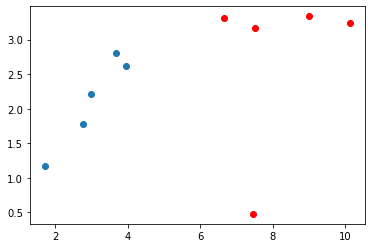

In [5]:
split_dict = best_split(dataset)
print(dataset)
print('Split:', split_dict['value'])

# plot to see where split should be
x = [2.771244718, 1.728571309, 3.678319846, 3.961043357, 2.999208922]
x2 = [7.497545867, 9.00220326, 7.444542326, 10.12493903, 6.642287351]
y = [1.784783929, 1.169761413, 2.81281357, 2.61995032, 2.209014212]
y2 = [3.162953546, 3.339047188, 0.476683375, 3.234550982, 3.319983761]
plt.scatter(x, y)
plt.scatter(x2, y2, color='r')

##### Testing Tree Build

In [14]:
max_depth = 10
min_size = 1
tree = build_tree(dataset, max_depth, min_size)
#print(tree)
print_tree(tree)

[X1 < 6.642]
 [X1 < 2.771]
  [0]
  [X1 < 2.771]
   [0]
   [0]
 [X1 < 7.498]
  [X1 < 7.445]
   [1]
   [1]
  [X1 < 7.498]
   [1]
   [1]


0

##### Testing Predict

In [15]:
# predict with a stump node
# value is top node in tree
stump = {'index': 0, 'right': 1, 'value': 6.642, 'left': 0}
for row in dataset:
    prediction = predict(stump, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


### Iris Testing

In [2]:
# testing on iris set
import pandas as pd
iris = pd.read_csv('data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# give classes numerical values instead
classes = iris['class'].values
classes[classes == 'Iris-setosa'] = 0 # replace Iris-setosa entries with 0
classes[classes == 'Iris-versicolor'] = 1 # Iris-versicolor = 1
classes[classes == 'Iris-virginica'] = 2 # Iris-virginica = 2
#print(classes)

data_iris = [ [iris['sepal_length'][i], iris['sepal_width'][i], iris['petal_length'][i], iris['petal_width'][i], 
       iris['class'][i]] for i in range(len(iris['sepal_length']))]
#print(data_iris)

In [29]:
max_depth = 10
min_size = 1
tree = build_tree(data_iris, max_depth, min_size)
#print(tree)
#print_tree(tree)

split_dict = best_split(data_iris)
print('Split:', split_dict['value'])

Split: 3.0


In [3]:
# terminal node / "stump" - uses first split value as its value
# stump = {'index': 0, 'right': 1, 'value': split_dict['value'], 'left': 0}

# print(predict(tree, [5.1, 3.5, 1.4, 0.2])) # should be 0
# print(predict(tree, [4.9, 3.0, 1.4, 0.2])) # should be 0
# print(predict(tree, [6.7, 3.0, 5.2, 2.3])) # should be 2

# track expected & predicted for further analysis
expectations = []
predictions = []
for d in data_iris:
    #print(d[:-1]) # dont include class at end
    prediction = (predict(tree, d[:-1]))
    predictions.append(prediction)
    expectations.append(d[-1])
    #print(f'Expected: {d[-1]}, Predicted={prediction}')

print(predictions)

NameError: name 'predict' is not defined